## Section 7. Logistic Regression


## Objective
1. **분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다. **
2. **실제로 구현하여 그 결과를 확인합니다.**

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 문제 1. Iris Dataset 을 이용해 Iris 종 구별(classification)하기

* Iris 데이터는 4개의 features 을 가지고 있습니다.
    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 

* Iris 데이터는 labels 은 3가지 class로 나뉘어 집니다. 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
![Imgur](https://i.imgur.com/EO2cI4i.png)

### Requirements


1. [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) 을 이용해 
**Numpy** 을 이용해 **Iris setosa Vs Iris Versicolour** 을 구별하는 **logistic regression** 모델을 생성 합니다.
2. cost 와 Accuracy 을 측정 합니다. 
3. cost 와 Accuracy 을 시각화 합니다. 


In [2]:
# 아래 코드를 실행해 주세요
np.random.seed(1)
iris = load_iris()

xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 답안지 입력란
* 아래에 답을 서술하여 주세요


In [3]:
# 문제 : Iris data 을 이용해 Numpy 을 이용해 Iris setosa Vs Iris Versicolour 을 구별하는 logistic regression 모델을 생성 

#################################################################################################
# data check
# xs.shape = (150, 4), ys.shape=(150, ) ys_name.shape(3,)

#################################################################################################
# data setting
def convert_label(target) :
    if target == 0.0 :
        label = 'setosa'
    elif target == 1.0 :
        label = 'versicolor'
    elif target == 2.0 :
        label = 'virginica'
    else :
        label = 'imposibble!!!!!!'
    return label
        

data = np.concatenate([xs, ys.reshape([-1,1])], axis=1)
column = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df = pd.DataFrame(data, columns=column)

label_list = []   ## TODO : 파이썬스러운걸로 바꿀필요 있음.
for i in range(150) :
    label = df.iloc[i, 4]
    label_list.append(convert_label(label))

df["label"] = label_list
df

,sepal_length,sepal_width,petal_length,petal_width,target,label
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


In [0]:
#################################################################################################
## define Logisitic Regression equation(로지스틱 회귀식 설정)

# MinMax Normalization 적용
temp_df = df.loc[:,"sepal_length" : "target"]   # Target값까지 normalization을 해야 한다!
df.loc[:,"sepal_length" : "target"] = (temp_df-temp_df.min())/(temp_df.max()-temp_df.min())

x1 = df.sepal_length
x2 = df.sepal_width
x3 = df.petal_length
x4 = df.petal_width
y = df.target
label = df.label

# weight 모두 0.1로 초기화
w0, w1, w2, w3, w4 = np.random.random(5)
bias = np.zeros(shape=(1))

In [0]:
# 로지스틱 회귀식 설정
# z = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 # logits #shape =(150,)
# pred = 1/ (1 + np.exp(-z)) #shape =(150,) # pred는 0~1사이의 확률값으로 나온다.

# # 손실함수 정의
# crossentropy = -np.mean(y*np.log(pred) + (1-y)*np.log(1-pred)) 

# # 미분함수 정의
# dw0 = np.mean(pred-y)
# dw1 = np.mean((pred-y)*x1)
# dw2 = np.mean((pred-y)*x2)
# dw3 = np.mean((pred-y)*x3)
# dw4 = np.mean((pred-y)*x4)

In [0]:
def cal_accuracy(pred) :
    temp_label = []
    for k in range(len(pred)) :
        if pred[k] <= 0.33 :
            temp_label.append("setosa")
        elif pred[k] <= 0.66 :
            temp_label.append("versicolor")
        else :
            temp_label.append("virginica")
            
    true_cnt = np.sum( temp_label == label ) #np는 boolean type을 casting변환 안해도 알아서 계산한다.
    return true_cnt/len(pred)

In [0]:
# 갱신된 weight와 mse 저장
w0_history = [w0]
w1_history = [w1]
w2_history = [w2]
w3_history = [w3]
w4_history = [w4]
bias_history = [bias]

loss_history = []
pred_history = []

alpha = 1e-1 # 학습률
epoch = 200


# Gradient Descent로 학습하기
for i in range(epoch):
    
    # 이전 가중치 가져오기
    old_w0 = w0_history[-1]
    old_w1 = w1_history[-1]
    old_w2 = w2_history[-1]    
    old_w3 = w3_history[-1]  
    old_w4 = w4_history[-1] 
    old_bias = bias_history[-1]
    
    # 로지스틱 회귀식 설정
    z = old_w0 + (old_w1*x1) + (old_w2*x2) + (old_w3*x3) + (old_w4*x4) + bias
    pred = 1 / (1 + np.exp(-z))
    
    # 미분값 갱신
    dw0 = np.mean(pred-y)
    dw1 = np.mean((pred-y)*x1)
    dw2 = np.mean((pred-y)*x2)
    dw3 = np.mean((pred-y)*x3)
    dw4 = np.mean((pred-y)*x4)    
    db = np.mean((pred-y), axis=0)
        
    # 경사 하강법을 통한 가중치 갱신
    new_w0 = old_w0 - alpha * dw0
    new_w1 = old_w1 - alpha * dw1
    new_w2 = old_w2 - alpha * dw2
    new_w3 = old_w3 - alpha * dw3
    new_w4 = old_w4 - alpha * dw4
    new_bias = old_bias - alpha * db
    
    # Loss값 계산
    crossentropy = -np.mean(y*np.log(pred) + (1-y)*np.log(1-pred))

    # 결과 저장
    w0_history.append(new_w0)
    w1_history.append(new_w1)
    w2_history.append(new_w2)
    w3_history.append(new_w3)
    w4_history.append(new_w4)
    bias_history.append(new_bias)
    
    loss_history.append(crossentropy)

    new_label = cal_accuracy(pred)
    pred_history.append(new_label)
    
    #print("loss = {:>1.2f}, accuracy = {:>1.2f}%".format(crossentropy, new_label*100))

Text(0.5, 1.0, 'accuracy')

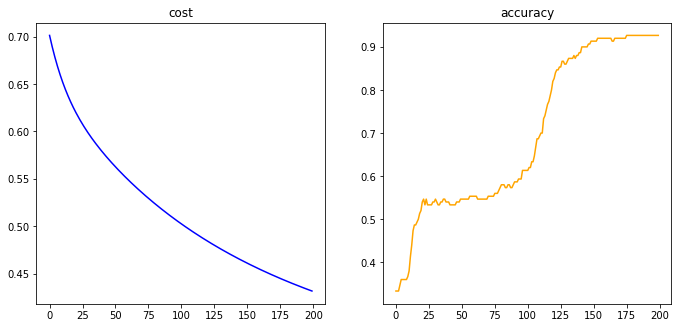

In [8]:
fig = plt.figure(figsize=(30, 30))

ax = fig.add_subplot(5,5,1)
ax.plot(loss_history, color="blue") 
plt.title("cost")

ax = fig.add_subplot(5,5,2)
ax.plot(pred_history, color="orange") 
plt.title("accuracy")
#ax.set_ylim(0.3, 1.0)

### 수업시간 해설 코드

(100, 4) (4, 1) (1,)


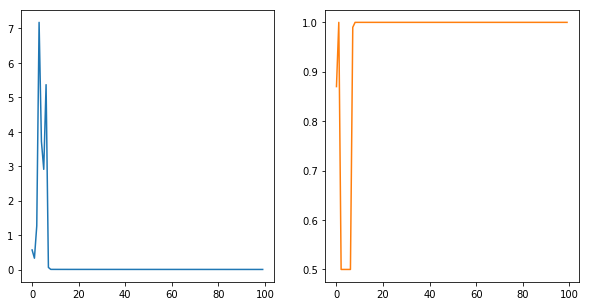

In [19]:
indices = np.where( (ys==0) | (ys==1) )[0]
xs_data = xs[indices]
ys_data = ys[indices]
ys_data = ys_data.reshape([-1, 1])

def sigmoid(logits) :
    return 1 / ( 1 + np.exp(-logits) )

def cee(prediction, true) :
    return -np.mean(true*np.log(prediction) + (1-true)*np.log(1-prediction))

weights = np.random.normal(size=(4,1), loc=0.0, scale=0.1)
#bias = np.array([0])
bias = np.zeros(shape=(1))

acc_list = []
loss_list = []

print(xs_data.shape, weights.shape, bias.shape)
for i in range(100) :
    logits = np.matmul(xs_data, weights) + bias
    pred = sigmoid(logits)
    loss = cee(pred, ys_data)
    d_w = np.matmul(np.transpose(xs_data), (pred - ys_data))  # 이부분이 잘 이해가 안됩니다
    d_b = np.mean( (pred - ys_data), axis=0)
    lr = 0.01
    weights = weights - d_w * lr
    bias = bias - d_b * lr
    acc = np.mean( np.equal(pred > 0.5, ys_data) )
    loss_list.append(loss)
    acc_list.append(acc)
    
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax = axes[0]
ax.plot(range(100), loss_list)
ax = axes[1]
ax.plot(range(100), acc_list, color='C1')

#### 정답 확인
* Cost는 0.5 아래로 떨어져야 합니다.
* Accuracy는 100%가 나올 수 있습니다. 

아래와 같은 그림이 나오면 성공 입니다.


![Imgur](https://i.imgur.com/jVvhXnY.png)

<hr>

Copyright(c) 2019 by Public AI. All rights reserved.<br>
Writen by PAI, Sangjae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/02/22
<hr>